In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sunpy.net import Fido, attrs as a
from sunpy.time import TimeRange

from datetime import datetime
from datetime import timedelta
import requests

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Fetching the data from DONKI
donki_flare = pd.read_json("https://kauai.ccmc.gsfc.nasa.gov/DONKI/WS/get/FLR?startDate=2010-01-01&endDate=2018-01-31")
donki_cme = pd.read_json("https://kauai.ccmc.gsfc.nasa.gov/DONKI/WS/get/CME?startDate=2010-01-01&endDate=2018-01-31")

In [3]:
print("Donki Flare data: \nShape",donki_flare.shape)
print("Columns:",donki_flare.columns)

print("\nDonki CME data: \nShape",donki_cme.shape)
print("Columns:",donki_cme.columns)

Donki Flare data: 
Shape (564, 15)
Columns: Index(['flrID', 'catalog', 'instruments', 'beginTime', 'peakTime', 'endTime',
       'classType', 'sourceLocation', 'activeRegionNum', 'note',
       'submissionTime', 'versionId', 'link', 'linkedEvents',
       'sentNotifications'],
      dtype='object')

Donki CME data: 
Shape (2758, 13)
Columns: Index(['activityID', 'catalog', 'startTime', 'instruments', 'sourceLocation',
       'activeRegionNum', 'note', 'submissionTime', 'versionId', 'link',
       'cmeAnalyses', 'linkedEvents', 'sentNotifications'],
      dtype='object')


In [4]:
# Extracting the important columns
donki_flare = donki_flare[['beginTime','peakTime','endTime','classType','activeRegionNum','linkedEvents']]
donki_cme = donki_cme[['startTime','sourceLocation','activeRegionNum','linkedEvents','cmeAnalyses']]

In [5]:
# Only Flares data
flares = donki_flare[donki_flare["linkedEvents"].isna()]
flares.reset_index(drop=True,inplace=True)
flares

,beginTime,peakTime,endTime,classType,activeRegionNum,linkedEvents
0,2010-06-12T00:30Z,2010-06-12T00:57Z,2010-06-12T01:02Z,M2.0,11081.0,None
1,2010-08-07T17:55Z,2010-08-07T18:24Z,2010-08-07T18:47Z,M1.0,11093.0,None
2,2010-10-16T19:07Z,2010-10-16T19:12Z,2010-10-16T19:15Z,M2.9,11112.0,None
3,2011-01-28T00:44Z,2011-01-28T01:03Z,2011-01-28T01:10Z,M1.3,11149.0,None
4,2011-02-09T01:23Z,2011-02-09T01:31Z,2011-02-09T01:35Z,M1.9,11153.0,None
...,...,...,...,...,...,...
362,2017-09-13T07:39Z,2017-09-13T07:48Z,2017-09-13T08:09Z,B1.4,12680.0,None
363,2017-09-20T12:32Z,2017-09-20T12:43Z,2017-09-20T13:00Z,B5.4,NaN,None
364,2017-09-20T19:28Z,2017-09-20T19:32Z,2017-09-20T19:49Z,B8.4,12680.0,None
365,2017-09-26T02:31Z,2017-09-26T02:34Z,2017-09-26T02:43Z,C1.8,12683.0,None


In [6]:
# Flare Associated with CME & SEP data
flare_linked = donki_flare[donki_flare["linkedEvents"].notna()]
flare_linked.reset_index(drop=True,inplace=True)
flare_linked

,beginTime,peakTime,endTime,classType,activeRegionNum,linkedEvents
0,2010-04-03T09:04Z,2010-04-03T09:54Z,2010-04-03T10:58Z,B7.4,11059.0,[{'activityID': '2010-04-03T09:54:00-CME-001'}]
1,2010-08-14T09:38Z,2010-08-14T10:05Z,2010-08-14T10:31Z,C4.4,11093.0,[{'activityID': '2010-08-14T12:30:00-SEP-001'}]
2,2010-08-18T04:45Z,2010-08-18T05:48Z,2010-08-18T06:51Z,C4.5,11099.0,[{'activityID': '2010-08-18T06:00:00-CME-001'}]
3,2011-02-15T01:44Z,2011-02-15T01:56Z,2011-02-15T02:06Z,X2.2,11158.0,[{'activityID': '2011-02-15T02:25:00-CME-001'}]
4,2011-02-24T07:23Z,2011-02-24T07:35Z,2011-02-24T07:42Z,M3.5,11163.0,[{'activityID': '2011-02-24T08:00:00-CME-001'}]
...,...,...,...,...,...,...
192,2017-09-08T07:40Z,2017-09-08T07:49Z,2017-09-08T07:58Z,M8.1,12673.0,[{'activityID': '2017-09-08T07:24:00-CME-001'}]
193,2017-09-10T15:35Z,2017-09-10T16:06Z,2017-09-10T16:31Z,X8.2,12673.0,[{'activityID': '2017-09-10T16:09:00-CME-001'}...
194,2017-09-12T07:23Z,2017-09-12T07:29Z,2017-09-12T07:48Z,C3.0,12680.0,[{'activityID': '2017-09-12T08:09:00-CME-001'}...
195,2017-09-12T19:03Z,2017-09-12T19:20Z,2017-09-12T19:28Z,C1.6,12680.0,[{'activityID': '2017-09-13T05:33:00-SEP-001'}]


In [7]:
# Only CME
cme = donki_cme[donki_cme["linkedEvents"].isna() & donki_cme["activeRegionNum"].notna()]
cme.reset_index(drop=True,inplace=True)
cme

,startTime,sourceLocation,activeRegionNum,linkedEvents,cmeAnalyses
0,2010-11-11T17:00Z,S22E03,11123.0,None,"[{'isMostAccurate': True, 'time21_5': '2010-11..."
1,2011-10-01T09:54Z,,11302.0,None,"[{'isMostAccurate': True, 'time21_5': '2011-10..."
2,2011-10-01T10:24Z,,11305.0,None,"[{'isMostAccurate': True, 'time21_5': '2011-10..."
3,2013-10-25T04:25Z,S07E76,11882.0,None,"[{'isMostAccurate': True, 'time21_5': '2013-10..."
4,2013-11-05T08:36Z,S16E51,11890.0,None,"[{'isMostAccurate': True, 'time21_5': '2013-11..."
...,...,...,...,...,...
181,2017-10-07T08:48Z,N13W78,12683.0,None,"[{'isMostAccurate': True, 'time21_5': '2017-10..."
182,2017-10-17T03:36Z,,12682.0,None,"[{'isMostAccurate': True, 'time21_5': '2017-10..."
183,2017-11-16T14:54Z,,12687.0,None,"[{'isMostAccurate': True, 'time21_5': '2017-11..."
184,2017-12-21T00:12Z,,12692.0,None,"[{'isMostAccurate': True, 'time21_5': '2017-12..."


In [8]:
# Changing the peaktime to datetime format
from datetime import datetime

def convert_to_datetime(tstr):
    year = int(tstr[:4])
    month = int(tstr[5:7])
    day = int(tstr[8:10])
    hour = int(tstr[11:13])
    minute = int(tstr[14:16])
    return datetime(year, month, day, hour, minute)

for i in range(flares.shape[0]):
    flares['peakTime'].iloc[i] = convert_to_datetime(flares['peakTime'].iloc[i])
for i in range(cme.shape[0]):
    cme['startTime'].iloc[i] = convert_to_datetime(cme['startTime'].iloc[i])
for i in range(flare_linked.shape[0]):
    flare_linked['peakTime'].iloc[i] = convert_to_datetime(flare_linked['peakTime'].iloc[i])

### Validation using GOES data

#### Flare Only

In [9]:
# Case 1: filling nan ARs
number_of_donki_mistakes = 0  # count the number of DONKI mistakes
# create an empty array to hold row numbers to drop at the end
flares_drops = []

for i in range(flares.shape[0]):
    if (np.isnan(flares.loc[i]['activeRegionNum'])):
        time = flares['peakTime'].iloc[i]
        time_range = TimeRange(time, time)
        listofresult = Fido.search(a.Time(time_range),a.hek.EventType("FL"),a.hek.OBS.Observatory == "GOES")

        if len(listofresult["hek"]) == 0:
            print(flares.loc[i]['classType'], "has no match in the GOES flare database ; dropping row.")
            flares_drops.append(i)
            number_of_donki_mistakes += 1
            continue
        else:
            if (listofresult[0]['ar_noaanum'] == 0):
                print(flares.loc[i]['activeRegionNum'], flares.loc[i]
                    ['classType'], "has no match in the GOES flare database ; dropping row.")
                flares_drops.append(i)
                number_of_donki_mistakes += 1
                continue
            else:
                print("Missing NOAA number:", flares['activeRegionNum'].iloc[i], flares['classType'].iloc[i],
                    flares['peakTime'].iloc[i], "should be", listofresult[0]['ar_noaanum'][0], "; changing now.")
                flares['activeRegionNum'].iloc[i] = listofresult[0]['ar_noaanum']
                number_of_donki_mistakes += 1

# Drop the rows for which there is no active region number in both the DONKI and GOES flare databases
flares = flares.drop(flares_drops)
flares = flares.reset_index(drop=True)
print('There are', number_of_donki_mistakes, 'DONKI mistakes so far.')

Missing NOAA number: nan X1.5 2011-03-09 23:23:00 should be 11166 ; changing now.
Missing NOAA number: nan M8.8 2011-09-25 04:50:00 should be 11302 ; changing now.
Missing NOAA number: nan M5.7 2012-05-10 04:18:00 should be 11476 ; changing now.
Missing NOAA number: nan M5.6 2012-07-02 10:52:00 should be 11515 ; changing now.
Missing NOAA number: nan M5.3 2012-07-04 09:55:00 should be 11515 ; changing now.
Missing NOAA number: nan M6.1 2012-07-05 11:44:00 should be 11515 ; changing now.
Missing NOAA number: nan M5.5 2012-08-18 01:02:00 should be 11548 ; changing now.
Missing NOAA number: nan M9.1 2012-10-20 18:14:00 should be 11598 ; changing now.
Missing NOAA number: nan M6.0 2012-11-13 02:04:00 should be 11613 ; changing now.
nan M1.7 has no match in the GOES flare database ; dropping row.
Missing NOAA number: nan M5.7 2013-05-03 17:32:00 should be 11739 ; changing now.
nan M1.1 has no match in the GOES flare database ; dropping row.
Missing NOAA number: nan C3.6 2014-04-22 05:47:00 

In [10]:
# Grab all the data from the GOES database
t_start = "2010-01-01"
t_end = "2018-12-31"
time_range = TimeRange(t_start, t_end)
listofresults = Fido.search(a.Time(time_range),a.hek.EventType("FL"),a.hek.OBS.Observatory == "GOES")
print('Grabbed all the GOES data; there are', len(listofresults["hek"]), 'events.')

KeyboardInterrupt: 

In [11]:
# Case 2: Updating Incorrect AR
peak_times_noaa = [item["event_peaktime"] for item in listofresults["hek"]]

for i in range(flares.shape[0]):
    # check if a particular DONKI flare peak time is also in the NOAA database
    peak_time_donki = flares['peakTime'].iloc[i]
    if peak_time_donki in peak_times_noaa:
        index = peak_times_noaa.index(peak_time_donki)
    else:
        continue
    # ignore NOAA active region numbers equal to zero
    if (listofresults["hek"][index]['ar_noaanum'] == 0):
        continue
    # if yes, check if the DONKI and NOAA active region numbers match up for this peak time
    # if they don't, flag this peak time and replace the DONKI number with the NOAA number
    if (listofresults["hek"][index]['ar_noaanum'] != int(flares['activeRegionNum'].iloc[i])):
        print('Messed up NOAA number:', int(flares['activeRegionNum'].iloc[i]), flares['classType'].iloc[i],
              flares['peakTime'].iloc[i], "should be", listofresults["hek"][index]['ar_noaanum'], "; changing now.")
        flares['activeRegionNum'].iloc[i] = listofresults["hek"][index]['ar_noaanum']
        number_of_donki_mistakes += 1
print('There are', number_of_donki_mistakes, 'DONKI mistakes so far.')

Messed up NOAA number: 11968 M1.3 2014-02-02 14:06:00 should be 11967 ; changing now.
Messed up NOAA number: 11967 M3.8 2014-02-04 01:23:00 should be 11968 ; changing now.
Messed up NOAA number: 12237 M1.3 2014-12-19 09:44:00 should be 12242 ; changing now.
Messed up NOAA number: 12322 M1.2 2015-04-21 22:01:00 should be 12325 ; changing now.
Messed up NOAA number: 12304 M2.2 2015-08-22 13:23:00 should be 12403 ; changing now.
Messed up NOAA number: 12304 M3.5 2015-08-22 21:24:00 should be 12403 ; changing now.
Messed up NOAA number: 12415 M1.5 2015-09-20 05:03:00 should be 12420 ; changing now.
Messed up NOAA number: 12423 M1.9 2015-09-27 10:40:00 should be 12422 ; changing now.
Messed up NOAA number: 12423 M1.1 2015-09-29 03:43:00 should be 12422 ; changing now.
Messed up NOAA number: 12423 C5.1 2015-09-29 04:46:00 should be 12428 ; changing now.
Messed up NOAA number: 12423 M2.9 2015-09-29 05:16:00 should be 12422 ; changing now.
Messed up NOAA number: 12565 M5.0 2016-07-23 02:11:00 

In [12]:
# Case 3: Updating flare peak time.

# create an empty array to hold row numbers to drop at the end
flares_drops = []

active_region_numbers_noaa = [item["ar_noaanum"]
                              for item in listofresults["hek"]]
flare_classes_noaa = [item["fl_goescls"] for item in listofresults["hek"]]

for i in range(flares.shape[0]):
    # check if a particular DONKI flare peak time is also in the NOAA database
    peak_time_donki = flares['peakTime'].iloc[i]
    if not peak_time_donki in peak_times_noaa:
        active_region_number_donki = int(
            flares['activeRegionNum'].iloc[i])
        flare_class_donki = flares['classType'].iloc[i]
        flare_class_indices = [i for i, x in enumerate(
            flare_classes_noaa) if x == flare_class_donki]
        active_region_indices = [i for i, x in enumerate(
            active_region_numbers_noaa) if x == active_region_number_donki]
        common_indices = list(
            set(flare_class_indices).intersection(active_region_indices))
        if common_indices:
            print("Messed up time:", int(flares['activeRegionNum'].iloc[i]), flares['classType'].iloc[i],
                  flares['peakTime'].iloc[i], "should be", peak_times_noaa[common_indices[0]], "; changing now.")
            flares['peakTime'].iloc[i] = peak_times_noaa[common_indices[0]]
            number_of_donki_mistakes += 1
        if not common_indices:
            print("DONKI flare peak time",
                  flares['peakTime'].iloc[i], "has no match; dropping row.")
            flares_drops.append(i)
            number_of_donki_mistakes += 1

# Drop the rows for which the NOAA active region number and flare class associated with
# the messed-up flare peak time in the DONKI database has no match in the GOES flare database
flares = flares.drop(flares_drops)
flares = flares.reset_index(drop=True)

# Create a list of corrected flare peak times
peak_times_donki = [flares['peakTime'].iloc[i]
                    for i in range(flares.shape[0])]

Messed up time: 11967 M2.1 2014-01-14 06:39:00 should be 2014-01-30 06:39:00.000 ; changing now.
DONKI flare peak time 2014-01-28 15:26:00 has no match; dropping row.
DONKI flare peak time 2014-02-02 16:36:00 has no match; dropping row.
Messed up time: 11967 M3.1 2014-02-02 18:18:00 should be 2014-02-02 18:11:00.000 ; changing now.
Messed up time: 11967 M1.3 2014-02-02 22:14:00 should be 2014-02-02 22:04:00.000 ; changing now.
DONKI flare peak time 2014-02-04 03:06:00 has no match; dropping row.
Messed up time: 11967 M1.5 2014-02-06 23:03:00 should be 2014-01-28 04:09:00.000 ; changing now.
Messed up time: 11967 M2.0 2014-02-07 04:53:00 should be 2014-02-07 04:56:00.000 ; changing now.
Messed up time: 11974 M2.3 2014-02-14 02:53:00 should be 2014-02-14 02:57:00.000 ; changing now.
DONKI flare peak time 2014-06-10 07:00:00 has no match; dropping row.
Messed up time: 12166 M2.1 2014-09-11 15:25:00 should be 2014-09-11 15:26:00.000 ; changing now.
Messed up time: 12192 X1.1 2014-10-19 05:

In [13]:
flares

,beginTime,peakTime,endTime,classType,activeRegionNum,linkedEvents
0,2010-06-12T00:30Z,2010-06-12 00:57:00,2010-06-12T01:02Z,M2.0,11081.0,None
1,2010-08-07T17:55Z,2010-08-07 18:24:00,2010-08-07T18:47Z,M1.0,11093.0,None
2,2010-10-16T19:07Z,2010-10-16 19:12:00,2010-10-16T19:15Z,M2.9,11112.0,None
3,2011-01-28T00:44Z,2011-01-28 01:03:00,2011-01-28T01:10Z,M1.3,11149.0,None
4,2011-02-09T01:23Z,2011-02-09 01:31:00,2011-02-09T01:35Z,M1.9,11153.0,None
...,...,...,...,...,...,...
351,2017-09-13T07:39Z,2017-09-13 07:48:00,2017-09-13T08:09Z,B1.4,12680.0,None
352,2017-09-20T12:32Z,2017-09-20 12:43:00,2017-09-20T13:00Z,B5.4,12681.0,None
353,2017-09-20T19:28Z,2017-09-20 19:32:00,2017-09-20T19:49Z,B8.4,12680.0,None
354,2017-09-26T02:31Z,2017-09-26 02:34:00,2017-09-26T02:43Z,C1.8,12683.0,None


In [14]:
flares.to_csv("only_flares.csv", index=False)

#### flares with CME and SEP

In [15]:
# Case 1: filling nan ARs
number_of_donki_mistakes = 0  # count the number of DONKI mistakes
# create an empty array to hold row numbers to drop at the end
flare_linked_drops = []

for i in range(flare_linked.shape[0]):
    if (np.isnan(flare_linked.loc[i]['activeRegionNum'])):
        time = flare_linked['peakTime'].iloc[i]
        time_range = TimeRange(time, time)
        listofresult = Fido.search(a.Time(time_range),a.hek.EventType("FL"),a.hek.OBS.Observatory == "GOES")

        if len(listofresult["hek"]) == 0:
            print(flare_linked.loc[i]['classType'], "has no match in the GOES flare database ; dropping row.")
            flare_linked_drops.append(i)
            number_of_donki_mistakes += 1
            continue
        else:
            if (listofresult[0]['ar_noaanum'] == 0):
                print(flare_linked.loc[i]['activeRegionNum'], flare_linked.loc[i]
                    ['classType'], "has no match in the GOES flare database ; dropping row.")
                flare_linked_drops.append(i)
                number_of_donki_mistakes += 1
                continue
            else:
                print("Missing NOAA number:", flare_linked['activeRegionNum'].iloc[i], flare_linked['classType'].iloc[i],
                    flare_linked['peakTime'].iloc[i], "should be", listofresult[0]['ar_noaanum'][0], "; changing now.")
                flare_linked['activeRegionNum'].iloc[i] = listofresult[0]['ar_noaanum']
                number_of_donki_mistakes += 1

# Drop the rows for which there is no active region number in both the DONKI and GOES flare databases
flare_linked = flare_linked.drop(flare_linked_drops)
flare_linked = flare_linked.reset_index(drop=True)
print('There are', number_of_donki_mistakes, 'DONKI mistakes so far.')

Missing NOAA number: nan X1.4 2011-09-22 11:01:00 should be 11302 ; changing now.
Missing NOAA number: nan X1.3 2012-03-07 01:14:00 should be 11430 ; changing now.
Missing NOAA number: nan M6.3 2012-03-09 03:53:00 should be 11429 ; changing now.
Missing NOAA number: nan M5.1 2012-05-17 01:47:00 should be 11476 ; changing now.
Missing NOAA number: nan X1.1 2012-07-06 23:08:00 should be 11515 ; changing now.
Missing NOAA number: nan M6.2 2012-07-28 20:56:00 should be 11532 ; changing now.
Missing NOAA number: nan M1.7 2012-11-08 02:23:00 should be 11611 ; changing now.
Missing NOAA number: nan M1.2 2013-03-15 06:58:00 should be 11692 ; changing now.
Missing NOAA number: nan X1.6 2013-05-13 02:17:00 should be 11748 ; changing now.
Missing NOAA number: nan X2.8 2013-05-13 16:05:00 should be 11748 ; changing now.
Missing NOAA number: nan X3.2 2013-05-14 01:11:00 should be 11748 ; changing now.
Missing NOAA number: nan X1.2 2013-05-15 01:48:00 should be 11748 ; changing now.
Missing NOAA num

In [16]:
# Case 2: Updating Incorrect AR
peak_times_noaa = [item["event_peaktime"] for item in listofresults["hek"]]

for i in range(flare_linked.shape[0]):
    # check if a particular DONKI flare peak time is also in the NOAA database
    peak_time_donki = flare_linked['peakTime'].iloc[i]
    if peak_time_donki in peak_times_noaa:
        index = peak_times_noaa.index(peak_time_donki)
    else:
        continue
    # ignore NOAA active region numbers equal to zero
    if (listofresults["hek"][index]['ar_noaanum'] == 0):
        continue
    # if yes, check if the DONKI and NOAA active region numbers match up for this peak time
    # if they don't, flag this peak time and replace the DONKI number with the NOAA number
    if (listofresults["hek"][index]['ar_noaanum'] != int(flare_linked['activeRegionNum'].iloc[i])):
        print('Messed up NOAA number:', int(flare_linked['activeRegionNum'].iloc[i]), flare_linked['classType'].iloc[i],
              flare_linked['peakTime'].iloc[i], "should be", listofresults["hek"][index]['ar_noaanum'], "; changing now.")
        flare_linked['activeRegionNum'].iloc[i] = listofresults["hek"][index]['ar_noaanum']
        number_of_donki_mistakes += 1
print('There are', number_of_donki_mistakes, 'DONKI mistakes so far.')

Messed up NOAA number: 11093 C4.4 2010-08-14 10:05:00 should be 11099 ; changing now.
Messed up NOAA number: 11283 X2.1 2011-09-06 22:20:00 should be 1283 ; changing now.
Messed up NOAA number: 11560 C8.4 2012-08-31 20:43:00 should be 11562 ; changing now.
Messed up NOAA number: 11943 X1.2 2014-01-07 18:32:00 should be 11944 ; changing now.
Messed up NOAA number: 12051 M1.2 2014-05-07 16:29:00 should be 12055 ; changing now.
Messed up NOAA number: 12160 M1.4 2014-07-01 11:23:00 should be 12106 ; changing now.
Messed up NOAA number: 12282 M2.4 2015-02-09 23:35:00 should be 12280 ; changing now.
Messed up NOAA number: 12321 M1.1 2015-04-23 10:07:00 should be 12322 ; changing now.
Messed up NOAA number: 12565 M7.6 2016-07-23 05:16:00 should be 12567 ; changing now.
Messed up NOAA number: 12565 M5.5 2016-07-23 05:31:00 should be 12567 ; changing now.
There are 42 DONKI mistakes so far.


In [17]:
# Case 3: Updating flare peak time.

# create an empty array to hold row numbers to drop at the end
flare_linked_drops = []

active_region_numbers_noaa = [item["ar_noaanum"]
                              for item in listofresults["hek"]]
flare_classes_noaa = [item["fl_goescls"] for item in listofresults["hek"]]

for i in range(flare_linked.shape[0]):
    # check if a particular DONKI flare peak time is also in the NOAA database
    peak_time_donki = flare_linked['peakTime'].iloc[i]
    if not peak_time_donki in peak_times_noaa:
        active_region_number_donki = int(
            flare_linked['activeRegionNum'].iloc[i])
        flare_class_donki = flare_linked['classType'].iloc[i]
        flare_class_indices = [i for i, x in enumerate(
            flare_classes_noaa) if x == flare_class_donki]
        active_region_indices = [i for i, x in enumerate(
            active_region_numbers_noaa) if x == active_region_number_donki]
        common_indices = list(
            set(flare_class_indices).intersection(active_region_indices))
        if common_indices:
            print("Messed up time:", int(flare_linked['activeRegionNum'].iloc[i]), flare_linked['classType'].iloc[i],
                  flare_linked['peakTime'].iloc[i], "should be", peak_times_noaa[common_indices[0]], "; changing now.")
            flare_linked['peakTime'].iloc[i] = peak_times_noaa[common_indices[0]]
            number_of_donki_mistakes += 1
        if not common_indices:
            print("DONKI flare peak time",
                  flare_linked['peakTime'].iloc[i], "has no match; dropping row.")
            flare_linked_drops.append(i)
            number_of_donki_mistakes += 1

# Drop the rows for which the NOAA active region number and flare class associated with
# the messed-up flare peak time in the DONKI database has no match in the GOES flare database
flare_linked = flare_linked.drop(flare_linked_drops)
flare_linked = flare_linked.reset_index(drop=True)

Messed up time: 11429 X1.1 2012-03-05 04:05:00 should be 2012-03-05 04:09:00.000 ; changing now.
DONKI flare peak time 2012-03-10 17:27:00 has no match; dropping row.
Messed up time: 11745 M5.0 2013-05-22 13:38:00 should be 2013-05-22 13:32:00.000 ; changing now.
DONKI flare peak time 2014-02-09 16:14:00 has no match; dropping row.
Messed up time: 12127 M1.5 2014-08-01 18:12:00 should be 2014-08-01 18:13:00.000 ; changing now.
Messed up time: 12146 M2.0 2014-08-25 15:10:00 should be 2014-08-25 15:11:00.000 ; changing now.
DONKI flare peak time 2014-09-03 13:53:00 has no match; dropping row.
DONKI flare peak time 2014-09-09 00:28:00 has no match; dropping row.
Messed up time: 12172 M2.3 2014-09-23 23:15:00 should be 2014-09-23 23:16:00.000 ; changing now.
Messed up time: 12242 X1.8 2014-12-20 00:24:00 should be 2014-12-20 00:28:00.000 ; changing now.
DONKI flare peak time 2015-05-12 03:22:00 has no match; dropping row.
Messed up time: 12445 M1.9 2015-11-04 03:25:00 should be 2015-11-04 

In [18]:
flare_linked.to_csv("flares_linked_cme_sep.csv", index=False)

#### only CMEs

In [19]:
cme.to_csv("only_cme.csv", index=False)

### Fetching JSOC Data

In [29]:
jsoc = pd.read_csv('http://jsoc.stanford.edu/doc/data/hmi/harpnum_to_noaa/all_harps_with_noaa_ars.txt', sep=' ')

In [46]:
def get_the_jsoc_data(event_count, t_rec):
    """
    Parameters
    ----------
    event_count: number of events
                 int

    t_rec:       list of times, one associated with each event in event_count
                 list of strings in JSOC format ('%Y.%m.%d_%H:%M_TAI')

    """

    catalog_data = []
    classification = []

    for i in range(event_count):

        print("=====", i, "=====")
        # next match NOAA_ARS to HARPNUM
        idx = jsoc[jsoc['NOAA_ARS'].str.contains(
            str(int(listofactiveregions[i])))]

        # if there's no HARPNUM, quit
        if (idx.empty == True):
            print('skip: there are no matching HARPNUMs for',
                  str(int(listofactiveregions[i])))
            continue

        # construct jsoc_info queries and query jsoc database; we are querying for 25 keywords
        url = "http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?ds=hmi.sharp_720s["+str(
            idx.HARPNUM.values[0])+"]["+t_rec[i]+"][? (CODEVER7 !~ '1.1 ') and (abs(OBS_VR)< 3500) and (QUALITY<65536) ?]&op=rs_list&key=USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH"
        response = requests.get(url)

        # if there's no response at this time, quit
        if response.status_code != 200:
            print('skip: cannot successfully get an http response')
            continue

        # read the JSON output
        data = response.json()

        # if there are no data at this time, quit
        if data['count'] == 0:
            print('skip: there are no data for HARPNUM',
                  idx.HARPNUM.values[0], 'at time', t_rec[i])
            continue

        # check to see if the active region is too close to the limb
        # we can compute the latitude of an active region in stonyhurst coordinates as follows:
        # latitude_stonyhurst = CRVAL1 - CRLN_OBS
        # for this we have to query the CEA series (but above we queried the other series as the CEA series does not have CODEVER5 in it)

        url = "http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?ds=hmi.sharp_cea_720s["+str(
            idx.HARPNUM.values[0])+"]["+t_rec[i]+"][? (abs(OBS_VR)< 3500) and (QUALITY<65536) ?]&op=rs_list&key=CRVAL1,CRLN_OBS"
        response = requests.get(url)

        # if there's no response at this time, quit
        if response.status_code != 200:
            print('skip: failed to find CEA JSOC data for HARPNUM',
                  idx.HARPNUM.values[0], 'at time', t_rec[i])
            continue

        # read the JSON output
        latitude_information = response.json()

        # if there are no data at this time, quit
        if latitude_information['count'] == 0:
            print('skip: there are no data for HARPNUM',
                  idx.HARPNUM.values[0], 'at time', t_rec[i])
            continue

        CRVAL1 = float(latitude_information['keywords'][0]['values'][0])
        CRLN_OBS = float(latitude_information['keywords'][1]['values'][0])
        if (np.absolute(CRVAL1 - CRLN_OBS) > 70.0):
            print('skip: latitude is out of range for HARPNUM',
                  idx.HARPNUM.values[0], 'at time', t_rec[i])
            continue

        if ('MISSING' in str(data['keywords'])):
            print('skip: there are some missing keywords for HARPNUM',
                  idx.HARPNUM.values[0], 'at time', t_rec[i])
            continue

        print('accept NOAA Active Region number', str(int(
            listofactiveregions[i])), 'and HARPNUM', idx.HARPNUM.values[0], 'at time', t_rec[i])

        individual_flare_data = []
        for j in range(18):
            individual_flare_data.append(
                float(data['keywords'][j]['values'][0]))

        catalog_data.append(list(individual_flare_data))

        single_class_instance = [idx.HARPNUM.values[0], str(
            int(listofactiveregions[i])), listofgoesclasses[i], t_rec[i]]
        classification.append(single_class_instance)

    return catalog_data, classification

In [38]:
only_flares = pd.read_csv("only_flares.csv")
only_cme = pd.read_csv("only_cme.csv")
flares_linked = pd.read_csv("flares_linked_cme_sep.csv")


In [44]:
type(only_cme["startTime"].iloc[0])

datetime.datetime

In [39]:
# Changing the peaktime to datetime format
from datetime import datetime

def convert_to_datetime(tstr):
    year = int(tstr[:4])
    month = int(tstr[5:7])
    day = int(tstr[8:10])
    hour = int(tstr[11:13])
    minute = int(tstr[14:16])
    return datetime(year, month, day, hour, minute)

for i in range(flares.shape[0]):
    only_flares['peakTime'].iloc[i] = convert_to_datetime(only_flares['peakTime'].iloc[i])
for i in range(cme.shape[0]):
    only_cme['startTime'].iloc[i] = convert_to_datetime(only_cme['startTime'].iloc[i])
for i in range(flare_linked.shape[0]):
    flare_linked['peakTime'].iloc[i] = convert_to_datetime(flare_linked['peakTime'].iloc[i])

TypeError: 'datetime.datetime' object is not subscriptable

In [51]:
for j in [48,60,72,84,96,108,120]:
    timedelayvariable = j
    print("Timedelay variable:", timedelayvariable)
    t_rec = [(only_flares['peakTime'].iloc[i] - timedelta(hours=timedelayvariable)).strftime('%Y.%m.%d_%H:%M_TAI') for i in range(only_flares.shape[0])]

    listofactiveregions = list(only_flares['activeRegionNum'].values.flatten())
    listofgoesclasses = list(only_flares['classType'].values.flatten())

    result = get_the_jsoc_data(only_flares.shape[0], t_rec)
    df1 = pd.DataFrame(result[0], columns=['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
                                          'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ', 'SAVNCPP',
                                          'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH'])
    df2 = pd.DataFrame(result[1], columns=['HARPNUM', 'NOAA_ARS', 'GOES_CLASS', 'PEAK_TIME'])
    df = pd.concat([df1, df2], axis=1)
    df.to_csv("jsoc/only_flares_" + str(timedelayvariable) + ".csv", index=False)

Timedelay variable: 48
===== 0 =====
skip: there are no data for HARPNUM 54 at time 2010.06.10_00:57_TAI
===== 1 =====
accept NOAA Active Region number 11093 and HARPNUM 115 at time 2010.08.05_18:24_TAI
===== 2 =====
accept NOAA Active Region number 11112 and HARPNUM 211 at time 2010.10.14_19:12_TAI
===== 3 =====
accept NOAA Active Region number 11149 and HARPNUM 345 at time 2011.01.26_01:03_TAI
===== 4 =====
accept NOAA Active Region number 11153 and HARPNUM 362 at time 2011.02.07_01:31_TAI
===== 5 =====
accept NOAA Active Region number 11158 and HARPNUM 377 at time 2011.02.11_17:38_TAI
===== 6 =====
accept NOAA Active Region number 11158 and HARPNUM 377 at time 2011.02.12_17:26_TAI
===== 7 =====
accept NOAA Active Region number 11158 and HARPNUM 377 at time 2011.02.14_01:39_TAI
===== 8 =====
accept NOAA Active Region number 11158 and HARPNUM 377 at time 2011.02.16_10:11_TAI
===== 9 =====
accept NOAA Active Region number 11164 and HARPNUM 393 at time 2011.02.26_12:52_TAI
===== 10 ====

In [52]:
for j in [12,24,36,48,60,72,84,96,108,120]:
    timedelayvariable = j
    print("Timedelay variable:", timedelayvariable)
    t_rec = [(flare_linked['peakTime'].iloc[i] - timedelta(hours=timedelayvariable)).strftime('%Y.%m.%d_%H:%M_TAI') for i in range(flare_linked.shape[0])]

    listofactiveregions = list(flare_linked['activeRegionNum'].values.flatten())
    listofgoesclasses = list(flare_linked['classType'].values.flatten())

    result = get_the_jsoc_data(flare_linked.shape[0], t_rec)
    df1 = pd.DataFrame(result[0], columns=['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
                                          'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ', 'SAVNCPP',
                                          'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH'])
    df2 = pd.DataFrame(result[1], columns=['HARPNUM', 'NOAA_ARS', 'GOES_CLASS', 'PEAK_TIME'])
    df = pd.concat([df1, df2], axis=1)
    df.to_csv("jsoc/flare_linked_" + str(timedelayvariable) + ".csv", index=False)

Timedelay variable: 12
===== 0 =====
skip: there are no matching HARPNUMs for 11059
===== 1 =====
accept NOAA Active Region number 11099 and HARPNUM 115 at time 2010.08.13_22:05_TAI
===== 2 =====
skip: there are no data for HARPNUM 115 at time 2010.08.17_17:48_TAI
===== 3 =====
accept NOAA Active Region number 11158 and HARPNUM 377 at time 2011.02.14_13:56_TAI
===== 4 =====
skip: there are no data for HARPNUM 392 at time 2011.02.23_19:35_TAI
===== 5 =====
accept NOAA Active Region number 11166 and HARPNUM 401 at time 2011.03.07_02:30_TAI
===== 6 =====
accept NOAA Active Region number 11164 and HARPNUM 393 at time 2011.03.07_08:12_TAI
===== 7 =====
skip: there are no data for HARPNUM 415 at time 2011.03.07_15:58_TAI
===== 8 =====
accept NOAA Active Region number 11226 and HARPNUM 637 at time 2011.06.06_18:41_TAI
===== 9 =====
accept NOAA Active Region number 11261 and HARPNUM 750 at time 2011.08.03_01:48_TAI
===== 10 =====
accept NOAA Active Region number 11261 and HARPNUM 750 at time 2

In [53]:
def get_the_jsoc_data(event_count, t_rec):
    """
    Parameters
    ----------
    event_count: number of events
                 int

    t_rec:       list of times, one associated with each event in event_count
                 list of strings in JSOC format ('%Y.%m.%d_%H:%M_TAI')

    """

    catalog_data = []
    classification = []

    for i in range(event_count):

        print("=====", i, "=====")
        # next match NOAA_ARS to HARPNUM
        idx = jsoc[jsoc['NOAA_ARS'].str.contains(
            str(int(listofactiveregions[i])))]

        # if there's no HARPNUM, quit
        if (idx.empty == True):
            print('skip: there are no matching HARPNUMs for',
                  str(int(listofactiveregions[i])))
            continue

        # construct jsoc_info queries and query jsoc database; we are querying for 25 keywords
        url = "http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?ds=hmi.sharp_720s["+str(
            idx.HARPNUM.values[0])+"]["+t_rec[i]+"][? (CODEVER7 !~ '1.1 ') and (abs(OBS_VR)< 3500) and (QUALITY<65536) ?]&op=rs_list&key=USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH"
        response = requests.get(url)

        # if there's no response at this time, quit
        if response.status_code != 200:
            print('skip: cannot successfully get an http response')
            continue

        # read the JSON output
        data = response.json()

        # if there are no data at this time, quit
        if data['count'] == 0:
            print('skip: there are no data for HARPNUM',
                  idx.HARPNUM.values[0], 'at time', t_rec[i])
            continue

        # check to see if the active region is too close to the limb
        # we can compute the latitude of an active region in stonyhurst coordinates as follows:
        # latitude_stonyhurst = CRVAL1 - CRLN_OBS
        # for this we have to query the CEA series (but above we queried the other series as the CEA series does not have CODEVER5 in it)

        url = "http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?ds=hmi.sharp_cea_720s["+str(
            idx.HARPNUM.values[0])+"]["+t_rec[i]+"][? (abs(OBS_VR)< 3500) and (QUALITY<65536) ?]&op=rs_list&key=CRVAL1,CRLN_OBS"
        response = requests.get(url)

        # if there's no response at this time, quit
        if response.status_code != 200:
            print('skip: failed to find CEA JSOC data for HARPNUM',
                  idx.HARPNUM.values[0], 'at time', t_rec[i])
            continue

        # read the JSON output
        latitude_information = response.json()

        # if there are no data at this time, quit
        if latitude_information['count'] == 0:
            print('skip: there are no data for HARPNUM',
                  idx.HARPNUM.values[0], 'at time', t_rec[i])
            continue

        CRVAL1 = float(latitude_information['keywords'][0]['values'][0])
        CRLN_OBS = float(latitude_information['keywords'][1]['values'][0])
        if (np.absolute(CRVAL1 - CRLN_OBS) > 70.0):
            print('skip: latitude is out of range for HARPNUM',
                  idx.HARPNUM.values[0], 'at time', t_rec[i])
            continue

        if ('MISSING' in str(data['keywords'])):
            print('skip: there are some missing keywords for HARPNUM',
                  idx.HARPNUM.values[0], 'at time', t_rec[i])
            continue

        print('accept NOAA Active Region number', str(int(
            listofactiveregions[i])), 'and HARPNUM', idx.HARPNUM.values[0], 'at time', t_rec[i])

        individual_flare_data = []
        for j in range(18):
            individual_flare_data.append(
                float(data['keywords'][j]['values'][0]))

        catalog_data.append(list(individual_flare_data))

        single_class_instance = [idx.HARPNUM.values[0], str(
            int(listofactiveregions[i])), listofcmeanalysis[i], t_rec[i]]
        classification.append(single_class_instance)

    return catalog_data, classification

In [61]:
for j in [12,24,36,48,60,72,84,96,108,120]:
    timedelayvariable = j
    print("Timedelay variable:", timedelayvariable)
    t_rec = [(cme['startTime'].iloc[i] - timedelta(hours=timedelayvariable)).strftime('%Y.%m.%d_%H:%M_TAI') for i in range(cme.shape[0])]

    listofactiveregions = list(cme['activeRegionNum'].values.flatten())
    listofcmeanalysis = list(cme['cmeAnalyses'].values.flatten())

    result = get_the_jsoc_data(cme.shape[0], t_rec)
    df1 = pd.DataFrame(result[0], columns=['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
                                          'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ', 'SAVNCPP',
                                          'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH'])
    df2 = pd.DataFrame(result[1], columns=['HARPNUM', 'NOAA_ARS', 'ANALYSIS', 'PEAK_TIME'])
    df = pd.concat([df1, df2], axis=1)
    df.to_csv("jsoc/only_cme_" + str(timedelayvariable) + ".csv", index=False)

Timedelay variable: 12
===== 0 =====
accept NOAA Active Region number 11123 and HARPNUM 245 at time 2010.11.11_05:00_TAI
===== 1 =====
accept NOAA Active Region number 11302 and HARPNUM 892 at time 2011.09.30_21:54_TAI
===== 2 =====
accept NOAA Active Region number 11305 and HARPNUM 902 at time 2011.09.30_22:24_TAI
===== 3 =====
skip: there are no data for HARPNUM 3311 at time 2013.10.24_16:25_TAI
===== 4 =====
accept NOAA Active Region number 11890 and HARPNUM 3341 at time 2013.11.04_20:36_TAI
===== 5 =====
accept NOAA Active Region number 11890 and HARPNUM 3341 at time 2013.11.06_02:36_TAI
===== 6 =====
accept NOAA Active Region number 11905 and HARPNUM 3420 at time 2013.11.25_16:36_TAI
===== 7 =====
accept NOAA Active Region number 11909 and HARPNUM 3437 at time 2013.12.06_19:39_TAI
===== 8 =====
skip: there are no data for HARPNUM 3587 at time 2014.01.08_00:48_TAI
===== 9 =====
skip: latitude is out of range for HARPNUM 3686 at time 2014.01.28_16:36_TAI
===== 10 =====
skip: there a

only_flares_12 Shape: (237, 22)
flare_linked_12 Shape: (109, 22)
only_cme_12 Shape: (101, 22)


only_flares_24 Shape: (248, 22)
flare_linked_24 Shape: (108, 22)
only_cme_24 Shape: (99, 22)


only_flares_36 Shape: (245, 22)
flare_linked_36 Shape: (112, 22)
only_cme_36 Shape: (109, 22)


only_flares_48 Shape: (245, 22)
flare_linked_48 Shape: (109, 22)
only_cme_48 Shape: (106, 22)


only_flares_60 Shape: (230, 22)
flare_linked_60 Shape: (108, 22)
only_cme_60 Shape: (98, 22)


only_flares_72 Shape: (219, 22)
flare_linked_72 Shape: (104, 22)
only_cme_72 Shape: (96, 22)


only_flares_84 Shape: (206, 22)
flare_linked_84 Shape: (100, 22)
only_cme_84 Shape: (94, 22)


only_flares_96 Shape: (201, 22)
flare_linked_96 Shape: (96, 22)
only_cme_96 Shape: (94, 22)


only_flares_108 Shape: (181, 22)
flare_linked_108 Shape: (87, 22)
only_cme_108 Shape: (86, 22)


only_flares_120 Shape: (177, 22)
flare_linked_120 Shape: (83, 22)
only_cme_120 Shape: (80, 22)




### Data

In [20]:
flare_linked = pd.read_csv("jsoc/flare_linked_12.csv")
only_cme = pd.read_csv("jsoc/only_cme_12.csv")
only_flares = pd.read_csv("jsoc/only_flares_12.csv")

In [21]:
flare_linked

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,...,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA_ARS,GOES_CLASS,PEAK_TIME
0,1.442016e+22,104.249,-0.007450,5357.871,25.487,1010.143,52.438,-0.019349,41.182,105.795,...,6.601919e+12,1.589956e+23,34.327,488.760559,3.807,166.467,115,11099,C4.4,2010.08.13_22:05_TAI
1,2.416427e+22,93.429,0.013943,15371.740,59.408,2940.413,68.471,0.030222,60.629,101.466,...,9.554389e+12,8.171862e+23,52.303,1078.161865,4.829,558.116,377,11158,X2.2,2011.02.14_13:56_TAI
2,2.316485e+22,96.645,-0.005333,11578.920,48.318,1829.461,61.270,-0.010615,53.676,101.450,...,9.006182e+12,5.367295e+23,45.522,946.170837,4.352,186.149,401,11166,M2.0,2011.03.07_02:30_TAI
3,6.534931e+22,85.268,0.002820,8713.998,24.840,4221.041,45.785,0.006022,39.556,94.534,...,1.857044e+13,1.046693e+24,33.991,1927.615967,4.976,255.077,393,11164,M3.7,2011.03.07_08:12_TAI
4,2.467217e+22,106.978,0.008833,3060.831,9.296,1419.924,43.043,0.028216,31.113,107.913,...,1.961166e+13,1.577271e+23,25.680,835.504700,3.859,342.725,637,11226,M2.5,2011.06.06_18:41_TAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,5.604837e+22,92.444,-0.032351,15655.120,37.497,5831.543,57.427,-0.052533,45.804,106.127,...,6.328512e+13,1.494623e+24,40.415,1898.472900,5.069,2325.598,7115,12673,M3.9,2017.09.07_11:59_TAI
105,5.613295e+22,93.027,-0.038322,15304.870,35.437,5842.066,57.352,-0.061129,45.110,106.716,...,7.511389e+13,1.433866e+24,39.519,1905.817749,5.048,2703.341,7115,12673,M1.2,2017.09.07_15:43_TAI
106,5.806990e+22,89.143,-0.031928,13799.640,34.294,5644.398,54.580,-0.053679,44.496,102.628,...,6.727857e+13,1.362156e+24,38.499,1908.245361,4.998,2373.013,7115,12673,M8.1,2017.09.07_19:49_TAI
107,6.273545e+21,75.352,0.003173,11195.290,42.382,316.479,41.020,0.006211,49.238,77.549,...,3.159556e+12,1.431625e+23,41.883,184.446060,3.729,30.550,7131,12680,C3.0,2017.09.11_19:29_TAI


In [22]:
only_cme

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,...,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA_ARS,ANALYSIS,PEAK_TIME
0,1.507124e+22,135.582,0.007611,3604.044,13.767,1416.605,64.129,0.024348,36.539,137.686,...,1.369774e+13,1.159824e+23,28.462,1171.015503,4.183,184.440,245,11123,"[{'isMostAccurate': True, 'time21_5': '2010-11...",2010.11.11_05:00_TAI
1,3.702705e+22,96.900,-0.016211,15245.260,48.519,3225.808,62.505,-0.027524,53.618,104.427,...,3.478225e+13,1.070507e+24,46.091,1687.398438,4.741,857.096,892,11302,"[{'isMostAccurate': True, 'time21_5': '2011-10...",2011.09.30_21:54_TAI
2,9.887384e+21,101.142,-0.029578,15793.910,55.681,1023.174,69.053,-0.057004,61.357,102.247,...,1.826780e+13,3.583161e+23,50.751,583.930054,4.287,505.244,902,11305,"[{'isMostAccurate': True, 'time21_5': '2011-10...",2011.09.30_22:24_TAI
3,6.834983e+22,85.107,0.011764,11441.550,32.970,5162.636,49.803,0.022286,43.596,95.353,...,3.703731e+13,1.386199e+24,38.209,2301.692383,5.021,1073.172,3341,11890,"[{'isMostAccurate': True, 'time21_5': '2013-11...",2013.11.04_20:36_TAI
4,5.911507e+22,98.799,0.010249,12648.870,37.735,5431.100,58.838,0.019593,46.629,107.898,...,1.286541e+13,1.363498e+24,40.829,2448.140869,5.009,831.904,3341,11890,"[{'isMostAccurate': True, 'time21_5': '2013-11...",2013.11.06_02:36_TAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.992408e+22,74.509,-0.003792,11549.770,38.098,1015.662,36.767,-0.008381,46.388,78.145,...,2.822306e+11,4.832121e+23,40.502,631.375427,3.271,119.461,7148,12683,"[{'isMostAccurate': True, 'time21_5': '2017-09...",2017.09.28_14:39_TAI
97,2.079321e+22,76.411,-0.004909,8543.737,24.247,1194.607,36.824,-0.010898,38.743,83.660,...,6.969821e+12,3.391231e+23,31.733,515.013000,4.215,146.706,7148,12683,"[{'isMostAccurate': True, 'time21_5': '2017-10...",2017.10.06_20:48_TAI
98,1.507876e+22,98.186,0.001690,3996.114,12.717,885.901,41.912,0.004405,33.049,101.120,...,3.977853e+12,1.161387e+23,27.673,389.947601,3.981,36.980,7189,12687,"[{'isMostAccurate': True, 'time21_5': '2017-11...",2017.11.16_02:54_TAI
99,6.013340e+21,117.000,0.005289,3809.664,12.328,434.736,54.299,0.011717,34.750,120.592,...,2.236462e+12,4.157309e+22,28.237,165.846252,3.676,43.456,7211,12692,"[{'isMostAccurate': True, 'time21_5': '2017-12...",2017.12.20_12:12_TAI


In [23]:
only_flares

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,...,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA_ARS,GOES_CLASS,PEAK_TIME
0,2.492258e+21,136.018,-0.010670,3867.412,26.318,266.345,73.914,-0.028015,45.745,143.165,...,2.072907e+12,2.074468e+22,35.722,91.149933,3.231,43.086,54,11081,M2.0,2010.06.11_12:57_TAI
1,1.291028e+22,96.459,-0.005842,8250.659,24.915,869.410,42.809,-0.014357,39.289,96.397,...,1.866188e+12,2.194078e+23,34.030,510.853424,3.739,116.988,115,11093,M1.0,2010.08.07_06:24_TAI
2,1.186780e+22,131.391,0.002885,3811.955,16.530,993.808,63.644,0.008215,37.853,132.928,...,6.300825e+12,9.150875e+22,29.788,696.704041,4.000,52.141,211,11112,M2.9,2010.10.16_07:12_TAI
3,1.250015e+22,112.350,0.025216,9586.912,50.103,1814.469,83.279,0.067965,59.725,118.404,...,2.250187e+13,2.976450e+23,48.945,574.865662,4.656,589.496,377,11158,M6.6,2011.02.13_05:38_TAI
4,2.313220e+22,98.992,0.021898,15359.870,57.868,2858.902,73.307,0.045729,60.477,108.353,...,1.715663e+13,7.623972e+23,51.407,1008.172302,4.967,818.450,377,11158,M2.2,2011.02.14_05:26_TAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,5.930980e+22,80.144,-0.014250,12896.500,31.664,4921.651,49.486,-0.025893,43.627,94.480,...,2.556215e+13,1.332456e+24,36.976,1862.779663,4.885,1108.560,7115,12673,M2.1,2017.09.08_11:45_TAI
233,5.855636e+22,79.850,-0.015104,12481.560,31.432,4598.592,48.064,-0.025761,42.954,94.869,...,2.320097e+13,1.212606e+24,36.622,1854.639160,4.811,1104.857,7115,12673,M1.1,2017.09.08_16:28_TAI
234,5.855636e+22,79.850,-0.015104,12481.560,31.432,4598.592,48.064,-0.025761,42.954,94.869,...,2.320097e+13,1.212606e+24,36.622,1854.639160,4.811,1104.857,7115,12673,M1.1,2017.09.08_16:28_TAI
235,7.043642e+21,92.091,0.002661,9896.233,37.659,405.066,47.296,0.005628,46.528,93.091,...,2.944581e+12,1.401531e+23,39.585,245.657135,3.902,28.374,7131,12680,B1.4,2017.09.12_19:48_TAI


### Standardization

In [24]:
def standardize(df):
    df = np.array(df)
    n_elements = df.shape[0]
    for j in range(df.shape[1]):
        standard_deviation_of_this_feature = np.std(df[:, j])
        median_of_this_feature = np.median(df[:, j])
        for i in range(n_elements):
            df[i, j] = (
                df[i, j] - median_of_this_feature) / (standard_deviation_of_this_feature)
    return df

In [25]:
only_flares = standardize(only_flares.iloc[:, :-4].values)
flare_linked = standardize(flare_linked.iloc[:, :-4].values)
only_cme = standardize(only_cme.iloc[:, :-4].values)

### Training using SVM

In [26]:
def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score

    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)

    Returns: true negative, false positive, true positive, false negative
    """
    Nobs = len(pred)
    TN = 0.
    TP = 0.
    FP = 0.
    FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print("Error! Observation could not be classified.")
    return TN, FP, TP, FN

In [ ]:
from matplotlib.pyplot import clf
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

xdata = np.vstack((only_flares, flare_linked, only_cme))
ydata = np.hstack((np.ones(only_flares.shape[0]), np.zeros(flare_linked.shape[0]), np.zeros(only_cme.shape[0])))

# lists to hold the TSS and standard deviation of the TSS
array_of_avg_TSS = np.ndarray([50])
array_of_std_TSS = np.ndarray([50])

# compute the TSS for a variety of k ranging from 2 to 52
# this is to see how the TSS varies as a function of k, and to test if k=10 really makes sense
for k in range(3, 15):
    skf = StratifiedKFold(n_splits=k, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    C = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
    gamma = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
    kernel = ["rbf"]
    param_grid = {'C': C, 'gamma': gamma, 'kernel': kernel, 'class_weight': ['balanced']}
    clf = GridSearchCV(
        SVC(cache_size=500, max_iter=-1, shrinking=True, tol=1e-8, probability=True),
        param_grid,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )

    for train_index, test_index in skf.split(xdata, ydata):
        # xtrain are the examples in the training set
        xtrain = xdata[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = xdata[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    array_of_avg_TSS[k-3] = np.mean(TSS_k)
    array_of_std_TSS[k-3] = np.std(TSS_k)

Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 6

In [28]:
only_flares_avg_tss = array_of_avg_TSS
only_flares_std_tss = array_of_std_TSS

In [29]:
from matplotlib.pyplot import clf
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

xdata = np.vstack((only_flares, flare_linked, only_cme))
ydata = np.hstack((np.zeros(only_flares.shape[0]), np.ones(flare_linked.shape[0]), np.zeros(only_cme.shape[0])))

# lists to hold the TSS and standard deviation of the TSS
array_of_avg_TSS = np.ndarray([50])
array_of_std_TSS = np.ndarray([50])

# compute the TSS for a variety of k ranging from 2 to 52
# this is to see how the TSS varies as a function of k, and to test if k=10 really makes sense
for k in range(3, 15):
    skf = StratifiedKFold(n_splits=k, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    C = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
    gamma = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
    kernel = ["rbf"]
    param_grid = {'C': C, 'gamma': gamma, 'kernel': kernel}
    clf = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=2)

    for train_index, test_index in skf.split(xdata, ydata):
        # xtrain are the examples in the training set
        xtrain = xdata[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = xdata[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    array_of_avg_TSS[k-2] = np.mean(TSS_k)
    array_of_std_TSS[k-2] = np.std(TSS_k)

Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 6

In [30]:
flare_linked_data = array_of_avg_TSS
flare_linked_std_data = array_of_std_TSS

In [32]:
from matplotlib.pyplot import clf
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

xdata = np.vstack((only_flares, flare_linked, only_cme))
ydata = np.hstack((np.zeros(only_flares.shape[0]), np.zeros(flare_linked.shape[0]), np.ones(only_cme.shape[0])))

# lists to hold the TSS and standard deviation of the TSS
array_of_avg_TSS = np.ndarray([50])
array_of_std_TSS = np.ndarray([50])

# compute the TSS for a variety of k ranging from 2 to 52
# this is to see how the TSS varies as a function of k, and to test if k=10 really makes sense
for k in range(3, 15):
    skf = StratifiedKFold(n_splits=k, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    C = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
    gamma = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
    kernel = ["rbf"]
    param_grid = {'C': C, 'gamma': gamma, 'kernel': kernel}
    clf = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=2)

    for train_index, test_index in skf.split(xdata, ydata):
        # xtrain are the examples in the training set
        xtrain = xdata[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = xdata[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    array_of_avg_TSS[k-2] = np.mean(TSS_k)
    array_of_std_TSS[k-2] = np.std(TSS_k)

Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 605 fits
Fitting 5 folds for each of 121 candidates, totalling 6

In [33]:
only_cme_avg_tss=  array_of_avg_TSS
only_cme_std_tss = array_of_std_TSS


In [1]:
np.save('svm12/only_flare_avg_tss.npy', only_flares_avg_tss)
np.save('svm12/only_flare_std_tss.npy', only_flares_std_tss)
np.save('svm12/flare_linked_avg_tss.npy', flare_linked_data)
np.save('svm12/flare_linked_std_tss.npy', flare_linked_std_data)
np.save('svm12/only_cme_avg_tss.npy', only_cme_avg_tss)
np.save('svm12/only_cme_std_tss.npy', only_cme_std_tss)

NameError: name 'only_flares_avg_tss' is not defined

In [5]:
only_flares_avg_tss = np.load("svm12/only_flare_avg_tss.npy")
only_flares_avg_tss = np.load("svm12/only_flare_std_tss.npy")
flare_linked_data = np.load("svm12/flare_linked_avg_tss.npy")
flare_linked_std_data = np.load("svm12/flare_linked_std_tss.npy")
only_cme_avg_tss = np.load("svm12/only_cme_avg_tss.npy")
only_cme_std_tss = np.load("svm12/only_cme_std_tss.npy")

In [ ]:
flare_linked_data

array([1.08221785e-312, 5.55555556e-002, 0.00000000e+000, 1.33378562e-001,
       0.00000000e+000, 1.14467930e-001, 1.05290059e-001, 7.40740741e-002,
       7.27272727e-002, 5.77712610e-002, 5.90676884e-002, 5.49802761e-002,
       1.02040816e-002, 1.01855798e-312, 1.01855798e-312, 1.10343781e-312,
       9.76118064e-313, 1.10343781e-312, 1.01855798e-312, 1.01855798e-312,
       1.12465777e-312, 9.76118064e-313, 1.01855798e-312, 1.01855798e-312,
       1.01855798e-312, 1.08221785e-312, 9.76118064e-313, 1.16709769e-312,
       1.01855798e-312, 1.01855798e-312, 1.08221785e-312, 9.76118064e-313,
       1.06099790e-312, 1.01855798e-312, 1.01855798e-312, 1.08221785e-312,
       9.76118064e-313, 1.06099790e-312, 1.01855798e-312, 1.01855798e-312,
       1.08221785e-312, 9.76118064e-313, 1.18831764e-312, 1.01855798e-312,
       1.01855798e-312, 1.08221785e-312, 9.76118064e-313, 1.08221785e-312,
       1.01855798e-312, 1.01855798e-312])

In [9]:
x

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

ValueError: x and y must be the same size

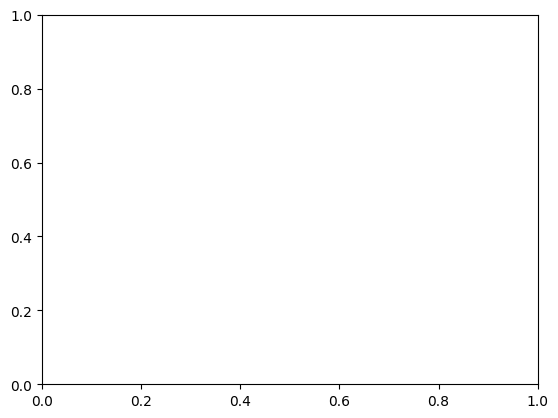

In [ ]:
x = np.arange(3,16)
plt.scatter(x,only_flares_avg_tss)
plt.errorbar(x,only_flares_std_tss)

### Training using MLP

In [35]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


In [36]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = Sequential()
model.add(Dense(18, activation='relu', input_shape=(only_flares.shape[1],)))
model.add(Dense(1, activation='relu'))



In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])